In [180]:
import os 
import pandas as pd

##  Task 1: Merge the 12 months of sales data into a single CSV file

In [181]:
df = pd.read_csv(r'C:\Users\Gracy Pauluse Ingle\Downloads\python_pandas\Sales_Data\Sales_April_2019.csv')

In [182]:
files = [ file for file in os.listdir('C:/Users/Gracy Pauluse Ingle/Downloads/python_pandas/Sales_Data')]

In [183]:
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(f'C:/Users/Gracy Pauluse Ingle/Downloads/python_pandas/Sales_Data/{file}')
    all_month_data = pd.concat([all_month_data, df ])

all_month_data.to_csv("all_data_csv",index=False)


## Read in updated dataframe

In [184]:
all_data = pd.read_csv("all_data_csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data cleaning 

#### Drop row with not a number

In [185]:
nan_data = all_data[all_data.isna().any(axis = 1)]
nan_data.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### I found that ther are same str value in the order date,  cleaning up 

In [186]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert column to proper type

In [187]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [188]:
all_data["Month"] = all_data["Order Date"].str[:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [189]:
all_data["Sale"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### Question 1: What was the best month for sales? How much was earned that month?

In [190]:
result = all_data.groupby("Month").sum()

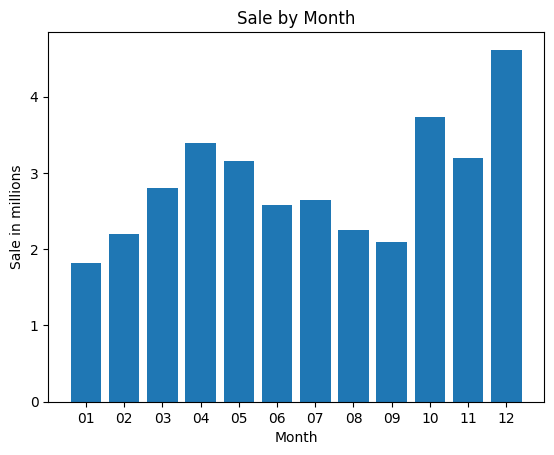

In [191]:

import matplotlib.pyplot as plt

# Extract month and Per_Order_Value from the result DataFrame
months = result.index
per_order_values = result["Sale"] / 1000000  # Convert values to millions


# Create a bar plot
plt.bar(months, per_order_values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Sale in millions')
plt.title('Sale by Month')


# Show the plot
plt.show()


### Question 2: What city had the highest number of sales

In [192]:
# Split the address by comma and extract the city part
def city(address):
    return address.split(',')[1].strip()
    
def state(address):
    return address.split(',')[2].strip().split(" ")[0]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f" {city(x)} ({state(x)}) ") 

# Display the DataFrame with the new "City" column
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95,San Francisco (CA)
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,99.99,Seattle (WA)
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95,Atlanta (GA)
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00,San Francisco (CA)
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,11.99,Boston (MA)


### Question 2: What city had the highest number of sales

In [193]:
city_sale = all_data.groupby("City").sum("Sale")
city_sale

,Quantity Ordered,Price Each,Sale
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


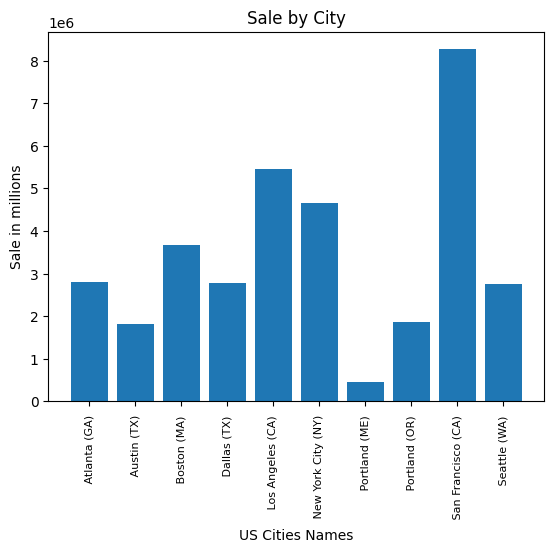

In [194]:

import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby("City")]


# Create a bar plot
plt.bar(cities, city_sale["Sale"])

# Add labels and title
plt.xlabel('US Cities Names')
plt.ylabel('Sale in millions')
plt.title('Sale by City')
plt.xticks(cities, rotation="vertical", size  = 8)

# Show the plot
plt.show()



In [195]:
# all_data.head()
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])


C:\Users\Gracy Pauluse Ingle\AppData\Local\Temp\ipykernel_7584\2515948410.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### Adding columns hour, minute with dt datetime modul

In [196]:
all_data["hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data["Count"]= 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27,1


### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Text(0.5, 1.0, 'Peak Sales Hours')

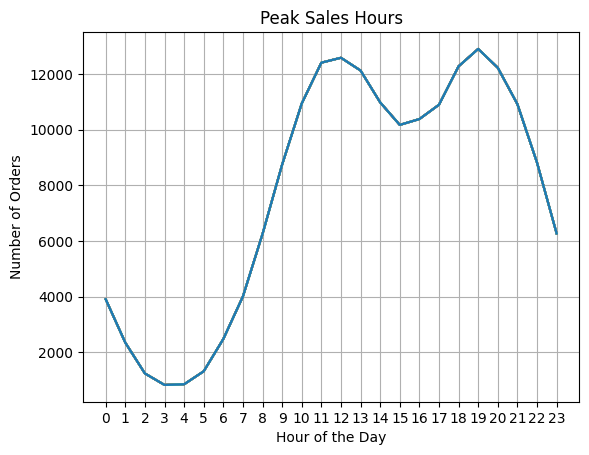

In [197]:
hours = [hour for hour, df in all_data.groupby("hour")]
print(hours)
plt.plot(hours, all_data.groupby("hour").count())

plt.xticks(hours)
plt.grid()
plt.show
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak Sales Hours')

# First happening at 11 am to 12 pm, with a second peak in the evening at 6pm to 7 pm mark

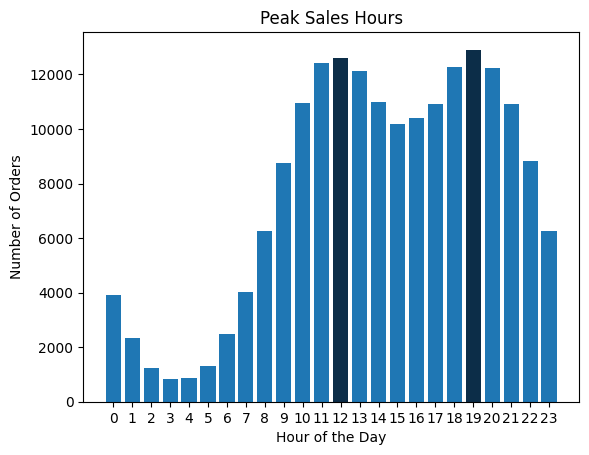

In [198]:
import matplotlib.pyplot as plt

# Calculate the count of orders per hour
hourly_count = all_data.groupby("hour").size()

# Plot the count of orders per hour using a bar plot
plt.bar(hourly_count.index, hourly_count)
plt.bar(12, hourly_count.loc[12], color='#0C2D48')
plt.bar(19, hourly_count.loc[19], color='#0C2D48')



# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak Sales Hours')
plt.xticks(range(24))  # Set ticks for each hour
# plt.grid(True)

# Show the plot
plt.show()
# First happening at 11 am to 12 pm, with a second peak in the evening at 6 pm to 7 pm mark

### Question 4: What products are most otten sold together?

In [199]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df.head(200)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2630,179076,USB-C Charging Cable,1,11.95,2019-05-01 00:17:00,"635 Chestnut St, San Francisco, CA 94016",05,11.95,San Francisco (CA),0,17,1
2662,179108,Lightning Charging Cable,1,14.95,2019-04-21 15:09:00,"828 West St, New York City, NY 10001",04,14.95,New York City (NY),15,9,1
2663,179108,AAA Batteries (4-pack),1,2.99,2019-04-21 15:09:00,"828 West St, New York City, NY 10001",04,2.99,New York City (NY),15,9,1
2683,179128,iPhone,1,700.00,2019-04-26 19:20:00,"10 Ridge St, San Francisco, CA 94016",04,700.00,San Francisco (CA),19,20,1


### Question S: What product sold the most? Why do you think it sold the most?

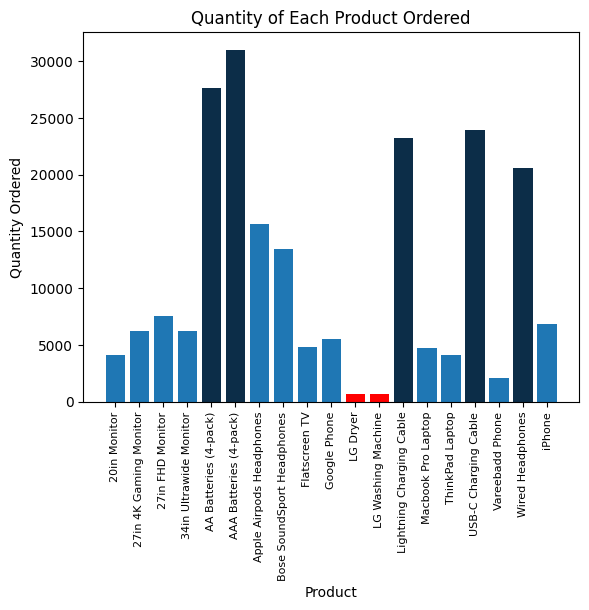

In [200]:
import matplotlib.pyplot as plt

product_group = all_data.groupby("Product")
quantity_order = product_group['Quantity Ordered'].sum()
products = [product for product, df in product_group]
# print(products)
# Create a bar plot
plt.bar(products, quantity_order)

# # Customize the color of a specific bar (for example, the bar corresponding to 'Product B')
specific_product = ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)','Lightning Charging Cable','USB-C Charging Cable','Wired Headphones']
plt.bar(specific_product, quantity_order[specific_product], color='#0C2D48')
low_product = ['LG Dryer', 'LG Washing Machine']
plt.bar(low_product, quantity_order[low_product], color='r')




# # Customize the plot
plt.xticks(products, rotation="vertical", size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity of Each Product Ordered')

# # Show the plot
plt.show()

C:\Users\Gracy Pauluse Ingle\AppData\Local\Temp\ipykernel_7584\3336569271.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<function matplotlib.pyplot.show(close=None, block=None)>

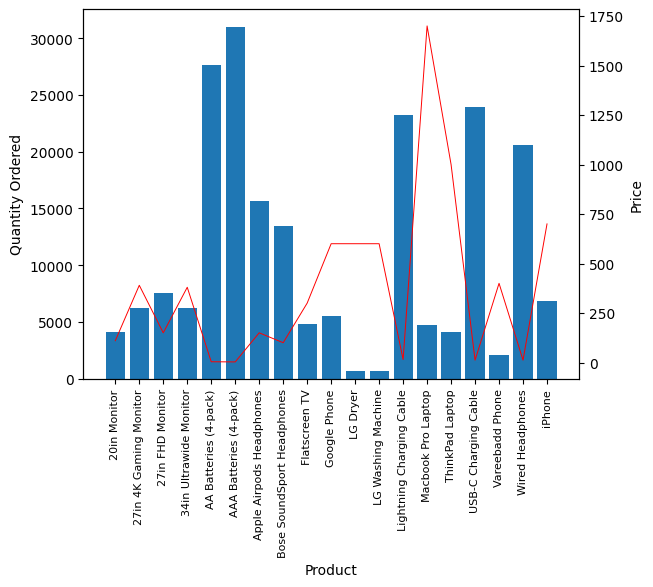

In [201]:
price = all_data.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_order)
ax2.plot(products, price, color='r', linewidth=0.7)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products, rotation="vertical", size=8)
plt.show